# Building an ML Model for Deployment

In [6]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model

In [7]:
SEED = 42
EPOCHS = 888
MODEL_PATH="./model/full_iris_model.h5"
SCALER_PATH="./model/iris_data_norm.pkl"

## IRIS Dataset

> `wget https://gist.githubusercontent.com/Thanatoz-1/9e7fdfb8189f0cdf5d73a494e4a6392a/raw/aaecbd14aeaa468cd749528f291aa8a30c2ea09e/iris_dataset.csv`

In [8]:
iris_dataset = pd.read_csv("./data/iris_dataset.csv")
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# separate features from labels
X = iris_dataset.drop('target', axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y = iris_dataset['target']
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
# 1-hot encoding labels
encoder = LabelBinarizer()
y = encoder.fit_transform(y)
y[0]

array([1, 0, 0])

In [12]:
# create training / testing datasets
X_train, X_test, y_train, y_test = train_test_split(
                                        X, y,
                                        test_size=0.2,
                                        random_state=SEED)

In [13]:
# normalize training data
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

## Building the Model

In [14]:
iris_model = Sequential([
    Dense(units=4, activation='relu', input_shape=[4,]),
    Dense(units=3, activation='softmax')
])

iris_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [26]:
# fitting the model
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0)

## Fitting the Model

In [27]:
history_iris_model = iris_model.fit(x=X_train_norm,
         y=y_train,
         epochs=EPOCHS,
         validation_data=(X_test_norm, y_test),
         callbacks=[early_stop])

Epoch 1/888
4/4 [==============================] - 1s 40ms/step - loss: 1.1879 - accuracy: 0.3250 - val_loss: 1.1359 - val_accuracy: 0.3667
Epoch 2/888
4/4 [==============================] - 0s 11ms/step - loss: 1.1838 - accuracy: 0.3250 - val_loss: 1.1319 - val_accuracy: 0.3667
Epoch 3/888
4/4 [==============================] - 0s 11ms/step - loss: 1.1788 - accuracy: 0.3250 - val_loss: 1.1279 - val_accuracy: 0.3667
Epoch 4/888
4/4 [==============================] - 0s 10ms/step - loss: 1.1742 - accuracy: 0.3250 - val_loss: 1.1241 - val_accuracy: 0.3667
Epoch 5/888
4/4 [==============================] - 0s 10ms/step - loss: 1.1705 - accuracy: 0.3250 - val_loss: 1.1205 - val_accuracy: 0.3667
Epoch 6/888
4/4 [==============================] - 0s 10ms/step - loss: 1.1660 - accuracy: 0.3250 - val_loss: 1.1171 - val_accuracy: 0.3667
Epoch 7/888
4/4 [==============================] - 0s 10ms/step - loss: 1.1616 - accuracy: 0.3250 - val_loss: 1.1138 - val_accuracy: 0.3667
Epoch 8/888
4/4 [===

4/4 [==============================] - 0s 11ms/step - loss: 1.0311 - accuracy: 0.4083 - val_loss: 1.0068 - val_accuracy: 0.4000
Epoch 118/888
4/4 [==============================] - 0s 11ms/step - loss: 1.0301 - accuracy: 0.4083 - val_loss: 1.0056 - val_accuracy: 0.4000
Epoch 119/888
4/4 [==============================] - 0s 10ms/step - loss: 1.0292 - accuracy: 0.4083 - val_loss: 1.0044 - val_accuracy: 0.4000
Epoch 120/888
4/4 [==============================] - 0s 11ms/step - loss: 1.0283 - accuracy: 0.4000 - val_loss: 1.0033 - val_accuracy: 0.4000
Epoch 121/888
4/4 [==============================] - 0s 11ms/step - loss: 1.0273 - accuracy: 0.4000 - val_loss: 1.0022 - val_accuracy: 0.4000
Epoch 122/888
4/4 [==============================] - 0s 10ms/step - loss: 1.0263 - accuracy: 0.4083 - val_loss: 1.0011 - val_accuracy: 0.4000
Epoch 123/888
4/4 [==============================] - 0s 12ms/step - loss: 1.0253 - accuracy: 0.4083 - val_loss: 1.0000 - val_accuracy: 0.4000
Epoch 124/888
4/4 [=

Epoch 175/888
4/4 [==============================] - 0s 10ms/step - loss: 0.9577 - accuracy: 0.4000 - val_loss: 0.9223 - val_accuracy: 0.4000
Epoch 176/888
4/4 [==============================] - 0s 10ms/step - loss: 0.9562 - accuracy: 0.4000 - val_loss: 0.9207 - val_accuracy: 0.4000
Epoch 177/888
4/4 [==============================] - 0s 10ms/step - loss: 0.9546 - accuracy: 0.4000 - val_loss: 0.9190 - val_accuracy: 0.4000
Epoch 178/888
4/4 [==============================] - 0s 10ms/step - loss: 0.9530 - accuracy: 0.4000 - val_loss: 0.9171 - val_accuracy: 0.4000
Epoch 179/888
4/4 [==============================] - 0s 10ms/step - loss: 0.9514 - accuracy: 0.4000 - val_loss: 0.9152 - val_accuracy: 0.4000
Epoch 180/888
4/4 [==============================] - 0s 10ms/step - loss: 0.9498 - accuracy: 0.4000 - val_loss: 0.9134 - val_accuracy: 0.4000
Epoch 181/888
4/4 [==============================] - 0s 11ms/step - loss: 0.9482 - accuracy: 0.4000 - val_loss: 0.9116 - val_accuracy: 0.4000
Epoch 

Epoch 233/888
4/4 [==============================] - 0s 10ms/step - loss: 0.8593 - accuracy: 0.3917 - val_loss: 0.8147 - val_accuracy: 0.4000
Epoch 234/888
4/4 [==============================] - 0s 10ms/step - loss: 0.8576 - accuracy: 0.3917 - val_loss: 0.8128 - val_accuracy: 0.4000
Epoch 235/888
4/4 [==============================] - 0s 10ms/step - loss: 0.8558 - accuracy: 0.3917 - val_loss: 0.8109 - val_accuracy: 0.4000
Epoch 236/888
4/4 [==============================] - 0s 11ms/step - loss: 0.8541 - accuracy: 0.3917 - val_loss: 0.8091 - val_accuracy: 0.4000
Epoch 237/888
4/4 [==============================] - 0s 11ms/step - loss: 0.8524 - accuracy: 0.3917 - val_loss: 0.8073 - val_accuracy: 0.4000
Epoch 238/888
4/4 [==============================] - 0s 11ms/step - loss: 0.8506 - accuracy: 0.3917 - val_loss: 0.8055 - val_accuracy: 0.4000
Epoch 239/888
4/4 [==============================] - 0s 12ms/step - loss: 0.8488 - accuracy: 0.3917 - val_loss: 0.8037 - val_accuracy: 0.4000
Epoch 

Epoch 291/888
4/4 [==============================] - 0s 11ms/step - loss: 0.7597 - accuracy: 0.7583 - val_loss: 0.7141 - val_accuracy: 0.7667
Epoch 292/888
4/4 [==============================] - 0s 10ms/step - loss: 0.7581 - accuracy: 0.7583 - val_loss: 0.7124 - val_accuracy: 0.8000
Epoch 293/888
4/4 [==============================] - 0s 10ms/step - loss: 0.7564 - accuracy: 0.7583 - val_loss: 0.7108 - val_accuracy: 0.7667
Epoch 294/888
4/4 [==============================] - 0s 11ms/step - loss: 0.7547 - accuracy: 0.7583 - val_loss: 0.7092 - val_accuracy: 0.8000
Epoch 295/888
4/4 [==============================] - 0s 12ms/step - loss: 0.7531 - accuracy: 0.7583 - val_loss: 0.7075 - val_accuracy: 0.8000
Epoch 296/888
4/4 [==============================] - 0s 10ms/step - loss: 0.7515 - accuracy: 0.7583 - val_loss: 0.7059 - val_accuracy: 0.8000
Epoch 297/888
4/4 [==============================] - 0s 10ms/step - loss: 0.7498 - accuracy: 0.7583 - val_loss: 0.7043 - val_accuracy: 0.8000
Epoch 

Epoch 349/888
4/4 [==============================] - 0s 26ms/step - loss: 0.6712 - accuracy: 0.8083 - val_loss: 0.6287 - val_accuracy: 0.8000
Epoch 350/888
4/4 [==============================] - 0s 18ms/step - loss: 0.6697 - accuracy: 0.8083 - val_loss: 0.6274 - val_accuracy: 0.8000
Epoch 351/888
4/4 [==============================] - 0s 20ms/step - loss: 0.6684 - accuracy: 0.8083 - val_loss: 0.6261 - val_accuracy: 0.8000
Epoch 352/888
4/4 [==============================] - 0s 19ms/step - loss: 0.6670 - accuracy: 0.8083 - val_loss: 0.6247 - val_accuracy: 0.8000
Epoch 353/888
4/4 [==============================] - 0s 21ms/step - loss: 0.6656 - accuracy: 0.8083 - val_loss: 0.6234 - val_accuracy: 0.8000
Epoch 354/888
4/4 [==============================] - 0s 22ms/step - loss: 0.6643 - accuracy: 0.8083 - val_loss: 0.6221 - val_accuracy: 0.8000
Epoch 355/888
4/4 [==============================] - 0s 18ms/step - loss: 0.6629 - accuracy: 0.8083 - val_loss: 0.6208 - val_accuracy: 0.8000
Epoch 

Epoch 407/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5995 - accuracy: 0.8250 - val_loss: 0.5611 - val_accuracy: 0.8333
Epoch 408/888
4/4 [==============================] - 0s 12ms/step - loss: 0.5984 - accuracy: 0.8250 - val_loss: 0.5601 - val_accuracy: 0.8333
Epoch 409/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5973 - accuracy: 0.8250 - val_loss: 0.5591 - val_accuracy: 0.8333
Epoch 410/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5963 - accuracy: 0.8250 - val_loss: 0.5581 - val_accuracy: 0.8333
Epoch 411/888
4/4 [==============================] - 0s 9ms/step - loss: 0.5952 - accuracy: 0.8250 - val_loss: 0.5571 - val_accuracy: 0.8333
Epoch 412/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5942 - accuracy: 0.8250 - val_loss: 0.5561 - val_accuracy: 0.8333
Epoch 413/888
4/4 [==============================] - 0s 12ms/step - loss: 0.5932 - accuracy: 0.8250 - val_loss: 0.5551 - val_accuracy: 0.8333
Epoch 4

Epoch 465/888
4/4 [==============================] - 0s 11ms/step - loss: 0.5447 - accuracy: 0.8500 - val_loss: 0.5097 - val_accuracy: 0.8333
Epoch 466/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5438 - accuracy: 0.8500 - val_loss: 0.5089 - val_accuracy: 0.8333
Epoch 467/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5430 - accuracy: 0.8500 - val_loss: 0.5081 - val_accuracy: 0.8333
Epoch 468/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5422 - accuracy: 0.8500 - val_loss: 0.5074 - val_accuracy: 0.8333
Epoch 469/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5414 - accuracy: 0.8500 - val_loss: 0.5066 - val_accuracy: 0.8333
Epoch 470/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5406 - accuracy: 0.8500 - val_loss: 0.5059 - val_accuracy: 0.8333
Epoch 471/888
4/4 [==============================] - 0s 10ms/step - loss: 0.5398 - accuracy: 0.8500 - val_loss: 0.5051 - val_accuracy: 0.8333
Epoch 

Epoch 523/888
4/4 [==============================] - 0s 12ms/step - loss: 0.5026 - accuracy: 0.8583 - val_loss: 0.4696 - val_accuracy: 0.8667
Epoch 524/888
4/4 [==============================] - 0s 12ms/step - loss: 0.5019 - accuracy: 0.8583 - val_loss: 0.4690 - val_accuracy: 0.8667
Epoch 525/888
4/4 [==============================] - 0s 11ms/step - loss: 0.5013 - accuracy: 0.8583 - val_loss: 0.4683 - val_accuracy: 0.8667
Epoch 526/888
4/4 [==============================] - 0s 13ms/step - loss: 0.5007 - accuracy: 0.8583 - val_loss: 0.4677 - val_accuracy: 0.8667
Epoch 527/888
4/4 [==============================] - 0s 11ms/step - loss: 0.5001 - accuracy: 0.8583 - val_loss: 0.4671 - val_accuracy: 0.8667
Epoch 528/888
4/4 [==============================] - 0s 11ms/step - loss: 0.4994 - accuracy: 0.8583 - val_loss: 0.4665 - val_accuracy: 0.8667
Epoch 529/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4988 - accuracy: 0.8583 - val_loss: 0.4659 - val_accuracy: 0.8667
Epoch 

Epoch 581/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4697 - accuracy: 0.8583 - val_loss: 0.4377 - val_accuracy: 0.8667
Epoch 582/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4693 - accuracy: 0.8583 - val_loss: 0.4372 - val_accuracy: 0.8667
Epoch 583/888
4/4 [==============================] - 0s 12ms/step - loss: 0.4687 - accuracy: 0.8583 - val_loss: 0.4368 - val_accuracy: 0.8667
Epoch 584/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4683 - accuracy: 0.8583 - val_loss: 0.4363 - val_accuracy: 0.8667
Epoch 585/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4677 - accuracy: 0.8583 - val_loss: 0.4358 - val_accuracy: 0.8667
Epoch 586/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4672 - accuracy: 0.8583 - val_loss: 0.4354 - val_accuracy: 0.8667
Epoch 587/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4668 - accuracy: 0.8583 - val_loss: 0.4349 - val_accuracy: 0.8667
Epoch 

Epoch 639/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4432 - accuracy: 0.8750 - val_loss: 0.4119 - val_accuracy: 0.9000
Epoch 640/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4428 - accuracy: 0.8750 - val_loss: 0.4115 - val_accuracy: 0.9000
Epoch 641/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4424 - accuracy: 0.8750 - val_loss: 0.4111 - val_accuracy: 0.9000
Epoch 642/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4420 - accuracy: 0.8750 - val_loss: 0.4107 - val_accuracy: 0.9000
Epoch 643/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4416 - accuracy: 0.8750 - val_loss: 0.4103 - val_accuracy: 0.9000
Epoch 644/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4411 - accuracy: 0.8833 - val_loss: 0.4099 - val_accuracy: 0.9000
Epoch 645/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4407 - accuracy: 0.8833 - val_loss: 0.4095 - val_accuracy: 0.9000
Epoch 

Epoch 697/888
4/4 [==============================] - 0s 11ms/step - loss: 0.4212 - accuracy: 0.8917 - val_loss: 0.3905 - val_accuracy: 0.9000
Epoch 698/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4209 - accuracy: 0.8917 - val_loss: 0.3901 - val_accuracy: 0.9000
Epoch 699/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4205 - accuracy: 0.8917 - val_loss: 0.3898 - val_accuracy: 0.9000
Epoch 700/888
4/4 [==============================] - 0s 11ms/step - loss: 0.4202 - accuracy: 0.8917 - val_loss: 0.3894 - val_accuracy: 0.9000
Epoch 701/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4198 - accuracy: 0.8917 - val_loss: 0.3891 - val_accuracy: 0.9000
Epoch 702/888
4/4 [==============================] - 0s 11ms/step - loss: 0.4195 - accuracy: 0.8917 - val_loss: 0.3887 - val_accuracy: 0.9000
Epoch 703/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4192 - accuracy: 0.8917 - val_loss: 0.3884 - val_accuracy: 0.9000
Epoch 

Epoch 755/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4022 - accuracy: 0.9083 - val_loss: 0.3712 - val_accuracy: 0.9000
Epoch 756/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4020 - accuracy: 0.9000 - val_loss: 0.3709 - val_accuracy: 0.9000
Epoch 757/888
4/4 [==============================] - 0s 11ms/step - loss: 0.4016 - accuracy: 0.9000 - val_loss: 0.3706 - val_accuracy: 0.9000
Epoch 758/888
4/4 [==============================] - 0s 12ms/step - loss: 0.4013 - accuracy: 0.9000 - val_loss: 0.3703 - val_accuracy: 0.9000
Epoch 759/888
4/4 [==============================] - 0s 11ms/step - loss: 0.4011 - accuracy: 0.9000 - val_loss: 0.3699 - val_accuracy: 0.9000
Epoch 760/888
4/4 [==============================] - 0s 10ms/step - loss: 0.4007 - accuracy: 0.9083 - val_loss: 0.3697 - val_accuracy: 0.9000
Epoch 761/888
4/4 [==============================] - 0s 12ms/step - loss: 0.4004 - accuracy: 0.9250 - val_loss: 0.3694 - val_accuracy: 0.9000
Epoch 

Epoch 813/888
4/4 [==============================] - 0s 11ms/step - loss: 0.3852 - accuracy: 0.9250 - val_loss: 0.3546 - val_accuracy: 0.9000
Epoch 814/888
4/4 [==============================] - 0s 11ms/step - loss: 0.3849 - accuracy: 0.9250 - val_loss: 0.3544 - val_accuracy: 0.9000
Epoch 815/888
4/4 [==============================] - 0s 10ms/step - loss: 0.3846 - accuracy: 0.9250 - val_loss: 0.3540 - val_accuracy: 0.9000
Epoch 816/888
4/4 [==============================] - 0s 11ms/step - loss: 0.3843 - accuracy: 0.9250 - val_loss: 0.3537 - val_accuracy: 0.9000
Epoch 817/888
4/4 [==============================] - 0s 10ms/step - loss: 0.3840 - accuracy: 0.9250 - val_loss: 0.3535 - val_accuracy: 0.9000
Epoch 818/888
4/4 [==============================] - 0s 10ms/step - loss: 0.3838 - accuracy: 0.9250 - val_loss: 0.3532 - val_accuracy: 0.9000
Epoch 819/888
4/4 [==============================] - 0s 10ms/step - loss: 0.3835 - accuracy: 0.9250 - val_loss: 0.3529 - val_accuracy: 0.9000
Epoch 

Epoch 871/888
4/4 [==============================] - 0s 10ms/step - loss: 0.3697 - accuracy: 0.9250 - val_loss: 0.3393 - val_accuracy: 0.9000
Epoch 872/888
4/4 [==============================] - 0s 10ms/step - loss: 0.3695 - accuracy: 0.9250 - val_loss: 0.3391 - val_accuracy: 0.9000
Epoch 873/888
4/4 [==============================] - 0s 12ms/step - loss: 0.3692 - accuracy: 0.9250 - val_loss: 0.3388 - val_accuracy: 0.9000
Epoch 874/888
4/4 [==============================] - 0s 11ms/step - loss: 0.3689 - accuracy: 0.9250 - val_loss: 0.3386 - val_accuracy: 0.9000
Epoch 875/888
4/4 [==============================] - 0s 13ms/step - loss: 0.3687 - accuracy: 0.9250 - val_loss: 0.3383 - val_accuracy: 0.9000
Epoch 876/888
4/4 [==============================] - 0s 11ms/step - loss: 0.3684 - accuracy: 0.9250 - val_loss: 0.3381 - val_accuracy: 0.9000
Epoch 877/888
4/4 [==============================] - 0s 12ms/step - loss: 0.3681 - accuracy: 0.9250 - val_loss: 0.3378 - val_accuracy: 0.9000
Epoch 

In [37]:
# evaluate the model
iris_model.evaluate(X_test_norm, y_test, verbose=0)
# [0.334958016872406, 0.8999999761581421]

[0.334958016872406, 0.8999999761581421]

In [48]:
# plot the validation accuracy
def plot_accuracy_curves(history, title):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['accuracy']))

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.legend();

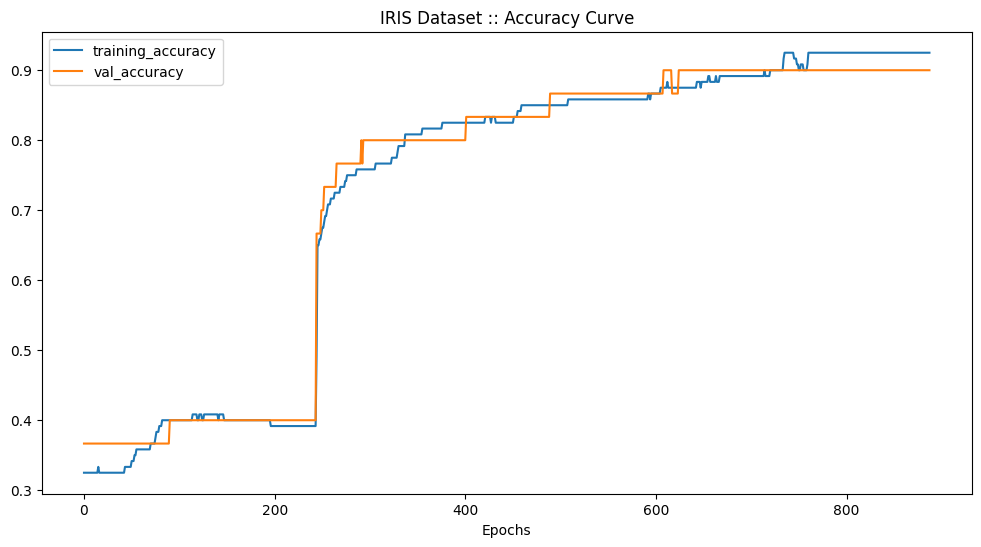

In [49]:
plot_accuracy_curves(history_iris_model, "IRIS Dataset :: Accuracy Curve")

In [52]:
# plot the training loss
def plot_loss_curves(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(history.history['loss']))

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.legend();

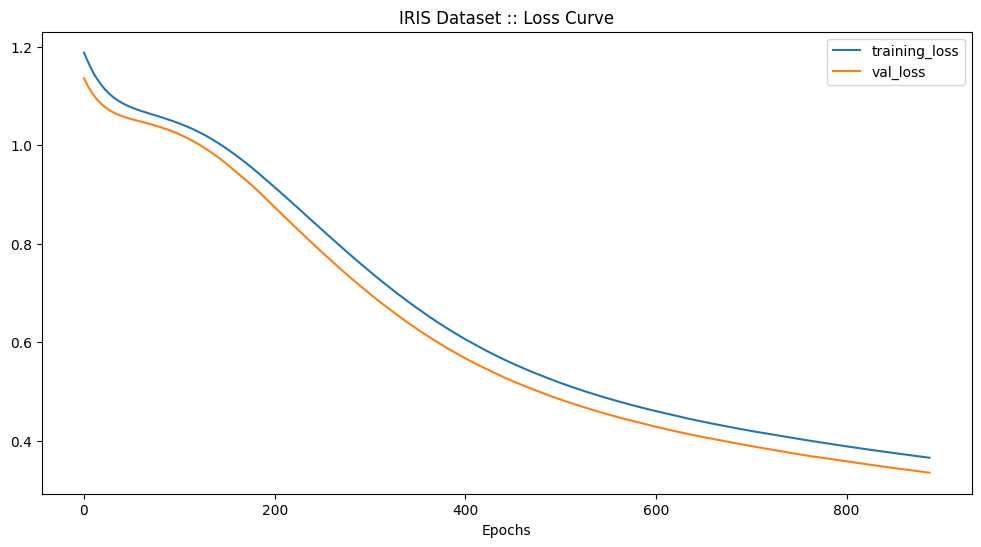

In [53]:
plot_loss_curves(history_iris_model, "IRIS Dataset :: Loss Curve")

## Fit all Data

After reaching a approx. 90% accuracy we can now add the testing data to our model training to increase the dataset variety the model was trained on.

In [16]:
X_norm =scaler.fit_transform(X)

In [17]:
iris_model_full = Sequential([
    Dense(units=4, activation='relu', input_shape=[4,]),
    Dense(units=3, activation='softmax')
])

iris_model_full.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [59]:
history_iris_model_full = iris_model_full.fit(X_norm, y, epochs=EPOCHS)

Epoch 1/888
5/5 [==============================] - 1s 2ms/step - loss: 1.0736 - accuracy: 0.3200
Epoch 2/888
5/5 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.3333
Epoch 3/888
5/5 [==============================] - 0s 3ms/step - loss: 1.0675 - accuracy: 0.3333
Epoch 4/888
5/5 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.3467
Epoch 5/888
5/5 [==============================] - 0s 3ms/step - loss: 1.0624 - accuracy: 0.3400
Epoch 6/888
5/5 [==============================] - 0s 3ms/step - loss: 1.0602 - accuracy: 0.3267
Epoch 7/888
5/5 [==============================] - 0s 3ms/step - loss: 1.0577 - accuracy: 0.3333
Epoch 8/888
5/5 [==============================] - 0s 2ms/step - loss: 1.0554 - accuracy: 0.3533
Epoch 9/888
5/5 [==============================] - 0s 2ms/step - loss: 1.0531 - accuracy: 0.3667
Epoch 10/888
5/5 [==============================] - 0s 3ms/step - loss: 1.0510 - accuracy: 0.4267
Epoch 11/888
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.5382 - accuracy: 0.7067
Epoch 168/888
5/5 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.7067
Epoch 169/888
5/5 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7067
Epoch 170/888
5/5 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.7067
Epoch 171/888
5/5 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7133
Epoch 172/888
5/5 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7133
Epoch 173/888
5/5 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7133
Epoch 174/888
5/5 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.7133
Epoch 175/888
5/5 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7133
Epoch 176/888
5/5 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7133
Epoch 177/888
5/5 [=====

5/5 [==============================] - 0s 3ms/step - loss: 0.3935 - accuracy: 0.8600
Epoch 332/888
5/5 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8600
Epoch 333/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8600
Epoch 334/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8600
Epoch 335/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8600
Epoch 336/888
5/5 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8600
Epoch 337/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8600
Epoch 338/888
5/5 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8600
Epoch 339/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8600
Epoch 340/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8600
Epoch 341/888
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.9200
Epoch 496/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.9200
Epoch 497/888
5/5 [==============================] - 0s 3ms/step - loss: 0.3227 - accuracy: 0.9200
Epoch 498/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.9200
Epoch 499/888
5/5 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.9200
Epoch 500/888
5/5 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.9200
Epoch 501/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.9200
Epoch 502/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.9200
Epoch 503/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.9200
Epoch 504/888
5/5 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.9200
Epoch 505/888
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.2642 - accuracy: 0.9533
Epoch 660/888
5/5 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.9533
Epoch 661/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.9533
Epoch 662/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2631 - accuracy: 0.9533
Epoch 663/888
5/5 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.9533
Epoch 664/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.9533
Epoch 665/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2621 - accuracy: 0.9533
Epoch 666/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2618 - accuracy: 0.9533
Epoch 667/888
5/5 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.9533
Epoch 668/888
5/5 [==============================] - 0s 2ms/step - loss: 0.2611 - accuracy: 0.9533
Epoch 669/888
5/5 [=====

5/5 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9667
Epoch 824/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.9667
Epoch 825/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2112 - accuracy: 0.9667
Epoch 826/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2109 - accuracy: 0.9667
Epoch 827/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9733
Epoch 828/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2103 - accuracy: 0.9667
Epoch 829/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9667
Epoch 830/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9667
Epoch 831/888
5/5 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9733
Epoch 832/888
5/5 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9733
Epoch 833/888
5/5 [=====

In [19]:
# evaluate the model
iris_model_full.evaluate(X_norm, y, verbose=0)
# [0.1931973546743393, 0.9733333587646484]

[1.1275221109390259, 0.36000001430511475]

In [61]:
# plot the validation and training loss
def plot_training_curves(history, title):
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    epochs = range(len(history.history['loss']))

    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, loss, label='training_loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.legend();

<Figure size 1200x600 with 0 Axes>

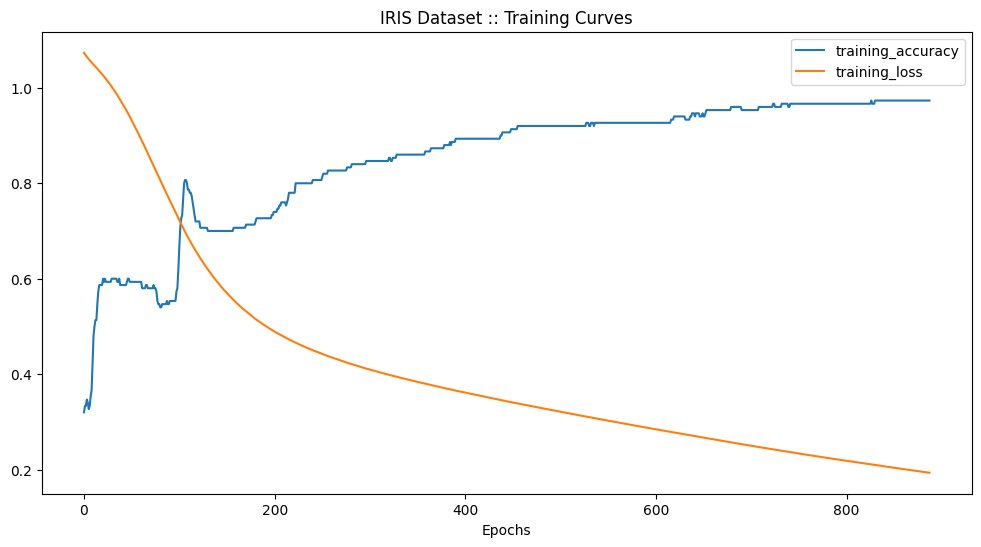

In [62]:
# plot accuracy and loss curves
plt.figure(figsize=(12, 6))
plot_training_curves(history_iris_model_full, "IRIS Dataset :: Training Curves")

## Save the Trained Model

In [68]:
# save the full model with training weights
iris_model_full.save(MODEL_PATH)

In [69]:
# save data preprocessing
joblib.dump(scaler, SCALER_PATH)

['./model/iris_data_norm.pkl']

## Run Predictions

In [18]:
# load the saved model
loaded_iris_model = load_model(MODEL_PATH)
loaded_scaler = joblib.load(SCALER_PATH)

In [20]:
# verify predictions are the same
loaded_iris_model.evaluate(X_norm, y, verbose=0)

[0.1931973546743393, 0.9733333587646484]

## Prediction API

In [5]:
# simulate JSON API call
flower_example = {"sepal length (cm)": 5.1,
                  "sepal width (cm)": 3.5,
                  "petal length (cm)":1.4,
                  "petal width (cm)": 0.2}

In [29]:
# API function (return class index with highest probability)
def return_prediction(model, scaler, json_request):
    s_len = json_request["sepal length (cm)"]
    s_wi = json_request["sepal width (cm)"]
    p_len = json_request["petal length (cm)"]
    p_w = json_request["petal width (cm)"]
    
    measures =[[s_len, s_wi, p_len, p_w]]
    measures_norm = scaler.transform(measures)
    
    flower_class_probabilities = model.predict(measures_norm)
    flower_class_index=np.argmax(flower_class_probabilities,axis=1)
                           
    return flower_class_index

In [30]:
return_prediction(loaded_iris_model, loaded_scaler, flower_example)
# probabilities array([[9.987895e-01, 7.723020e-04, 4.383073e-04]], dtype=float32)
# index array([0])

1/1 [==============================] - 0s 23ms/step


/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])

In [32]:
# API function (return class name)
def return_prediction(model, scaler, json_request):
    s_len = json_request["sepal length (cm)"]
    s_wi = json_request["sepal width (cm)"]
    p_len = json_request["petal length (cm)"]
    p_w = json_request["petal width (cm)"]
    
    classes = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    measures =[[s_len, s_wi, p_len, p_w]]
    measures_norm = scaler.transform(measures)
    
    flower_class_probabilities = model.predict(measures_norm)
    flower_class_index=np.argmax(flower_class_probabilities,axis=1)
                       
    return classes[flower_class_index]

In [33]:
return_prediction(loaded_iris_model, loaded_scaler, flower_example)
# array(['Iris-setosa'], dtype='<U15')

1/1 [==============================] - 0s 20ms/step


/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype='<U15')